<a href="https://colab.research.google.com/github/Takashi-Tokyo/oizumi_datascience/blob/master/L1L2Norm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

sns.set(style="whitegrid", palette="muted", color_codes=True) #

In [ ]:
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))
    
    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

In [ ]:
def draw_lp_contour(func, lp=1, xlim=(0, 1), ylim=(0, 1)):
    n = 201
    X, Y = np.meshgrid(np.linspace(xlim[0], xlim[1], n), np.linspace(ylim[0], ylim[1], n))
    Z = func(X, Y, lp) 

    cm = generate_cmap(['salmon', 'salmon', 'salmon', 'salmon', 'blue'])

    interval = [i/10. -1 for i in range(20)]
    im = plt.contour(X, Y, Z, interval, alpha=0.5, cmap=cm)

    #fig.colorbar(im)
    plt.title("Outline of LP{}".format(lp))
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])

In [ ]:
def LP(x, y, lp=int(1)):
    x = np.abs(x) 
    y = np.abs(y)
    return (x**lp + y**lp)**(1/lp)

#$L_1$距離とは
マンハッタン距離ともいう。   
n次元ベクトル$\vec{x}= (x_1,x_2, …, x_n),\vec{y}=(y_1,y_2,…,y_n) $および$1\leqq p < \infty$なる$p$に対して  
$\displaystyle \sum_{k=1}^{n}|x_k-y_k|$

#$L_2$距離とは
ユークリッド距離ともいう。  

$\displaystyle \sum_{k=1}^{n}|x_k-y_k|^\frac{1}{2}$

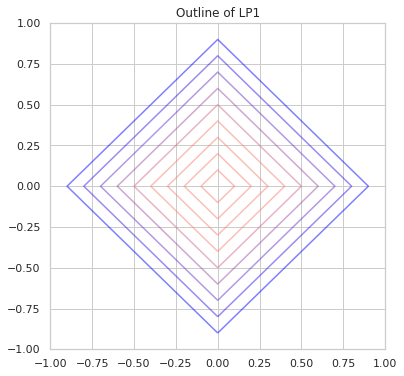

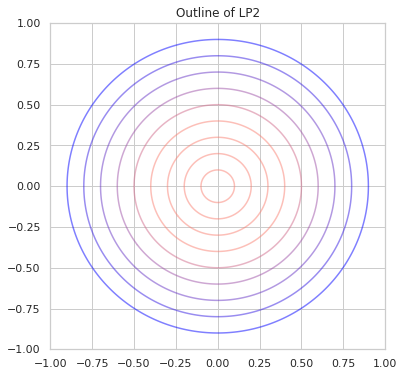

In [ ]:
for lp in range(2):
    fig =plt.figure(figsize=(6,6))
    draw_lp_contour(LP, lp+1, (-1, 1),(-1, 1))

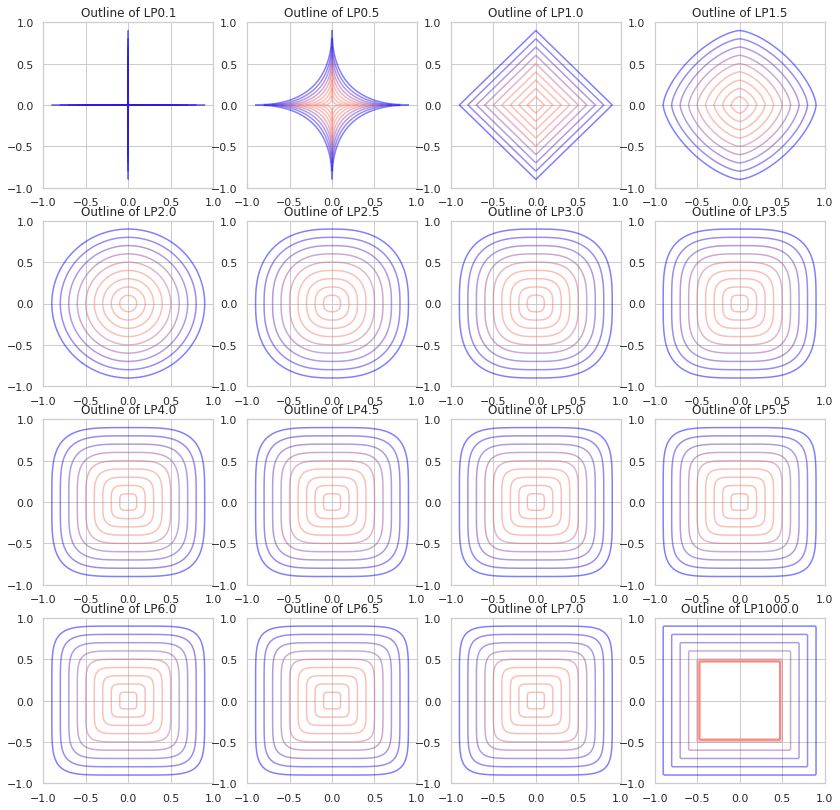

In [ ]:
fig =plt.figure(figsize=(14,14))
size = 4
for i, lp in enumerate(np.r_[[0.1], np.linspace(0.5, 7, 14), [1000]]):
    plt.subplot(size, size, i+1)
    draw_lp_contour(LP, lp, (-1, 1),(-1, 1))

#$L_P$距離とは
ミンコフスキー距離ともいう。  
n次元ベクトル$\vec{x}= (x_1,x_2, …, x_n),\vec{y}=(y_1,y_2,…,y_n) $および$1\leqq p < \infty$なる$p$に対して  
$\Bigl(\displaystyle \sum_{k=1}^{n}|x_k-y_k|^p\Bigl)^\frac{1}{p} $

#$L_∞$距離とは
チェビシェフ距離ともいう。  
$\underset{k}{max}|x_k-y_k|$
